# Dimensionality Reduction

This Notebook is a small debrief from dimensionality reduction techniques as explained in the following books:

<b>"Hands on Machine Learning with Scikit-Learn, Keras and Tensorflow". Aurelien Géron (2019)
    
<b>"Machine Learning with Pytorch and Scikit-Learn" S. Raschka, Y. Liu, V.Mirjalili


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

from sklearn import datasets
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',\
                      header = None)
df_wine.columns = ['Class label', 'Alcohol','Malic acid','Ash','Alcalinity of ash',\
                   'Magnesium','Total phenols','Flavanoids', 'Nonflavanoid phenols',\
                   'Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines',\
                   'Proline']
df_wine.tail()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [3]:
from sklearn.model_selection import train_test_split

X_wine, y_wine = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size = 0.3, \
                                                          stratify = y_wine, random_state = 42)

# Feature Standarization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#scaler.fit(X_train)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## PCA Analysis of the Wine Dataset 

PCA is an unsupervised technique which does not use any class label information. PCA needs as input standarized data.

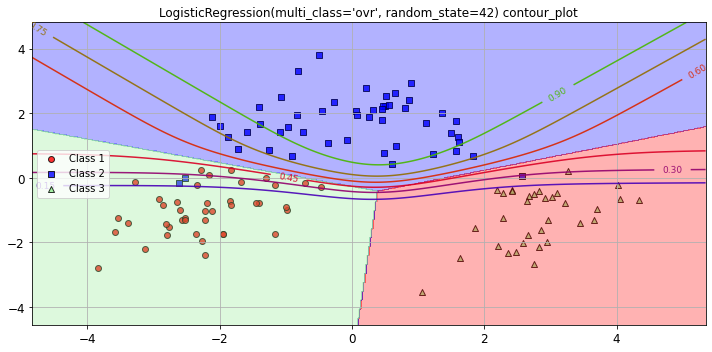

In [4]:
from sklearn.linear_model import LogisticRegression
from plot_decision_regions import plot_decision_regions
from sklearn.decomposition import PCA

# Initialize PCA estimator

pca = PCA(n_components = 2)
lr_wine = LogisticRegression(multi_class = 'ovr', random_state = 42, solver = 'lbfgs')

# Dimensionality Reduction

X_wine_train_pca = pca.fit_transform(X_train_scaled)
X_wine_test_pca = pca.transform(X_test_scaled)

# Fit the LR model
lr_wine.fit(X_wine_train_pca, (-1)*y_train)

plot_decision_regions(X_wine_train_pca,
                      y_train,
                      classifier = lr_wine,
                      dataset_name = 'Wine_PCA')

In [5]:
# Explained variance ratios of the different principal components

In [6]:
pca_explained = PCA(n_components= None)
X_wine_train_pca = pca_explained.fit_transform(X_train_scaled)
pca_explained.explained_variance_ratio_

array([0.35730453, 0.19209164, 0.11006755, 0.07250719, 0.06973166,
       0.05341402, 0.04555029, 0.0241568 , 0.02040417, 0.01976974,
       0.01685307, 0.01086639, 0.00728295])

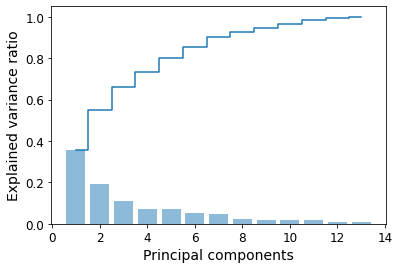

In [7]:
plt.bar(range(1, 14), pca_explained.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca_explained.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

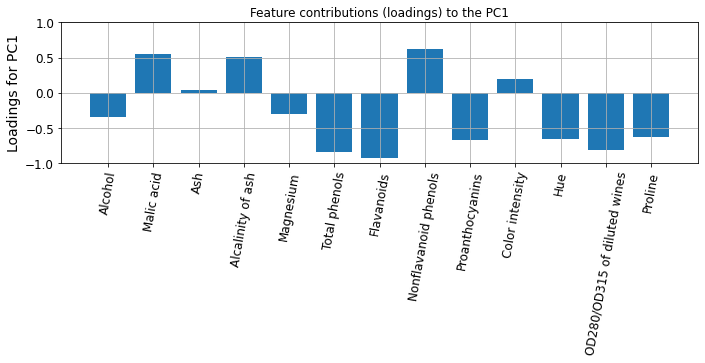

In [8]:
# Assessing Feature Importance

sklearn_loadings = pca_explained.components_.T * np.sqrt(pca_explained.explained_variance_)

fig,ax = plt.subplots(figsize = (10,5))
# Change 0 to see another PC

pc_num = 0
ax.bar(range(13), sklearn_loadings[:,pc_num], align = 'center')
ax.set_ylabel('Loadings for PC' + str(pc_num +1))
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation =80)
plt.ylim([-1,1])
plt.tight_layout()
plt.grid(True)
plt.title('Feature contributions (loadings) to the PC' + str(pc_num +1))
plt.show()

In [9]:
# Choosing the right number of dimensions

# Preserve the 95% of the training set variance
cumsum = np.cumsum(pca_explained.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

# Now set the n_components = d and run PCA again
# Another way to do it in the training directly is to set n_components = 0.95
# Now selecting the n_components = d we are able to compress the dataset preserving 
# the 95% of the variance.

10

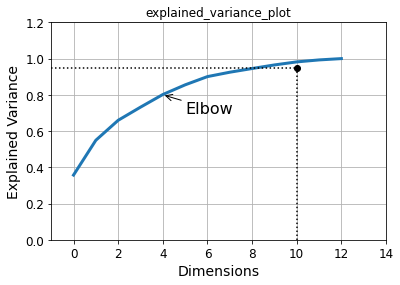

In [10]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([-1, 14, 0, 1.2])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([-1, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(4, 0.8), xytext=(5, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.title("explained_variance_plot")
plt.show()

## Supervised data compression via linear discriminant analysis (LDA)

LDA is a classification algorithm, during training it learns the most discriminative axes between 
the clases, and these axes can be then used to define a hyperplane onto which to project the data. The benefit of this approach is that the projection will keep classes as far apart as possible, so LDA is a good technique tqo reduce dimensionality before running another classification algorithm  such as SVM.

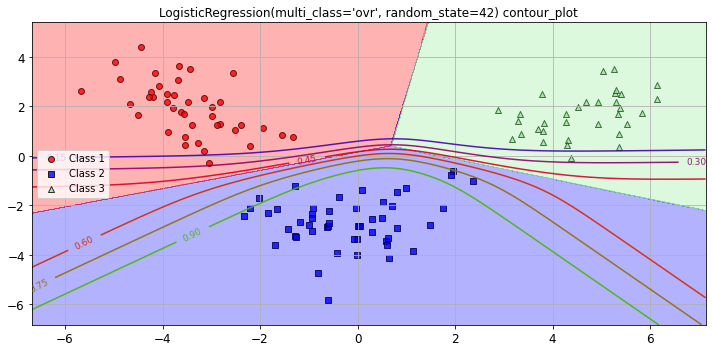

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda_wine = LDA(n_components = 2)
X_train_lda = lda_wine.fit_transform(X_train_scaled,y_train)

lr_wine_lda = LogisticRegression(multi_class = 'ovr', random_state = 42, solver = 'lbfgs')

# Fit the LR model
lr_wine_lda.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda,
                      y_train,
                      classifier = lr_wine_lda,
                      dataset_name = 'Wine_PCA')


## Non-Linear dimensionality reduction and visualization with t-SNE

t-SNE (t-distributed Stochastic Neighbor Embedding) is an unsupervised method that reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It is mostly used for visualization, in particular to visualize clusters of instances in high-dimensional space.

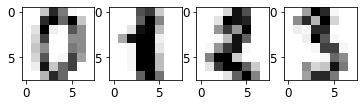

In [12]:
from sklearn.datasets import load_digits

digits = load_digits()

y_digits = digits.target
X_digits = digits.data

fig, ax = plt.subplots(1, 4)

for i in range(4):
    ax[i].imshow(digits.images[i], cmap='Greys')
    
# plt.savefig('figures/05_12.png', dpi=300)
plt.show() 

In [13]:
digits.data.shape

(1797, 64)

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,
            init='pca',
            random_state=123)
X_digits_tsne = tsne.fit_transform(X_digits)

c:\programdata\miniforge3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\programdata\miniforge3\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


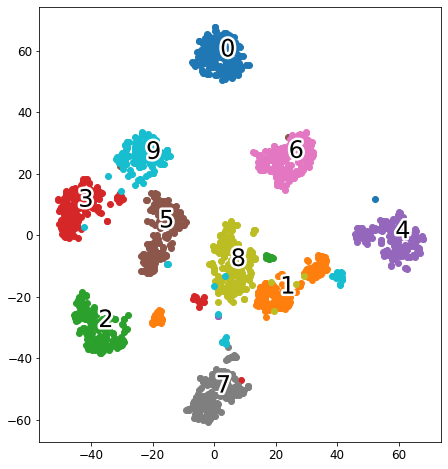

In [15]:
from plot_projection import plot_projection

plot_projection(X_digits_tsne, y_digits)
# plt.savefig('figures/05_13.png', dpi=300)
plt.show()